# Clustering, k-means
Cluster the data sets train_smpl, **`train_smpl_<label>`** (apply required filters and/or attribute selections if needed), using the k-means algorithm:
* First try to work in a classical clustering scenario and assume that classes are not given. Research methods which allow you to visualise and analyse clusters (and the performance of the clustering algorithm on your data set).
* Note the accuracy of k-means relative to the given clusters.

In [2]:
 from Scripts import helperfn as hf
 from Scripts import downsample as ds
 from sklearn.cluster import KMeans 
 from Scripts import plotScripts as ps

 import numpy as np
 import matplotlib.pyplot as plt

 import pandas as pd


In [72]:
X = hf.get_data_noresults()

Y = hf.get_results(-1)
X, Y = hf.balance_by_class(X, Y, size=None, allow_imbalance=False)

# X = ds.downscale(X)
# X = pd.DataFrame(data=X)

X = hf.mutate_to_ewb(X)

#reset index inorder to match cluster indicies for checking what clusters true labels are
X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)


# from Scripts import pixelFinder as pf

# bestPixels = pf.bestPixels(-1, 250)
# onlyBestPixels = X.iloc[:, bestPixels]

# X, Y = hf.balance_by_class(onlyBestPixels, Y, size=None, allow_imbalance=False)

In [73]:
# 10 clusters due to 10 classes, or 2 because of reuslt datasheet
kmeans = KMeans(n_clusters=10, max_iter=100, random_state=121, algorithm='elkan').fit(X)

In [74]:
from collections import Counter, defaultdict

def ClusterIndicesNumpy(clustNum, labels_array):
    return np.where(labels_array == clustNum)[0]

cluster = {}

for i in range(len(np.unique(Y))):
    indecies = ClusterIndicesNumpy(i, kmeans.labels_)
    inCluster = Y.to_numpy()[indecies].flatten()

    cluster[i] = Counter(inCluster)
    # print("cluster-", i, "classes:- ", Counter(inCluster))


classes = []

#2d array count of 0 class all clusters
for i in range(len(np.unique(Y))):
    temp = []
    for j in range(len(np.unique(Y))):
        temp.append(cluster[i].get(j,0))
    classes.append(temp)

classes = np.array(classes).T

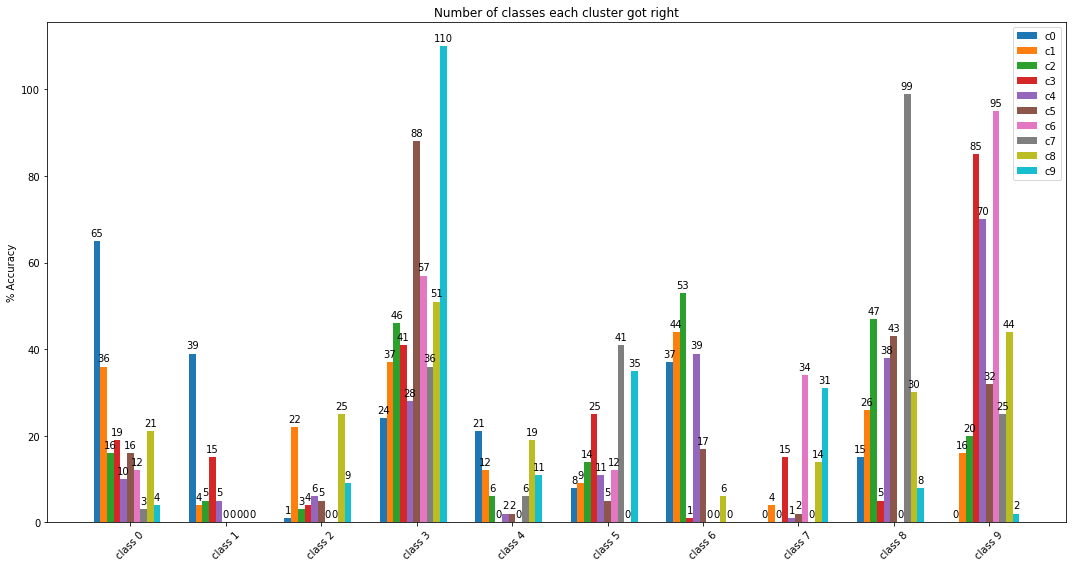

In [75]:
ps.plot_scores(classes, ["c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"], title="Number of classes each cluster got right", labels=["class 0", "class 1", "class 2", "class 3", "class 4", "class 5", "class 6", "class 7", "class 8", "class 9"], bar_width=0.07, figure_size=(15, 8))

# plt.savefig('foo.png',dpi=400)

In [54]:
kmeans = KMeans(n_clusters=2, max_iter=800, random_state=193).fit(X)

cluster = {}

for i in range(2):
    indecies = ClusterIndicesNumpy(i, kmeans.labels_)
    inCluster = Y.to_numpy()[indecies].flatten()
    
    cluster[i] = Counter(inCluster)
    print("cluster-", i, "classes:- ", Counter(inCluster))

cluster- 0 classes:-  Counter({8: 134, 7: 112, 1: 98, 0: 93, 5: 90, 2: 89, 4: 76, 9: 74, 6: 34, 3: 16})
cluster- 1 classes:-  Counter({3: 194, 6: 176, 9: 136, 4: 134, 2: 121, 5: 120, 0: 117, 1: 112, 7: 98, 8: 76})


In [55]:
# index 0 - circle, index 1 - rectangle
sign = np.zeros((2, 2))

for i in range(len(cluster)):
    for key, value in cluster[i].items():
        if key < 5:
            sign[i][0] += value 

    sign[i][1] = sum(cluster[0].values()) - sign[i][0]

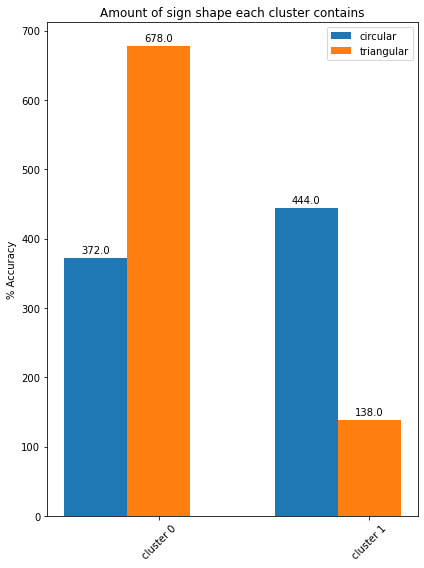

In [56]:
ps.plot_scores(sign, ["circular", "triangular"], title="Amount of sign shape each cluster contains", labels=["cluster 0", "cluster 1"], bar_width=0.3, figure_size=(6, 8))